# 1. Math Drills

Give an example of a binary relation on a set which is

1. Reflexive and symmetric, but not transitive  
2. Reflexive, but neither symmetric nor transitive  
3. Symmetric, but neither reflexive nor transitive  
4. Transitive, but neither reflexive nor symmetric  

Recall the definitions from the lectures if you need to!

### Useful Resources
[Video](https://www.youtube.com/watch?v=6fwJj14O_TM)

In [1]:
# The set we will map our relations to
setA = {1,2,3}

# 1. Reflexive and Symmetric, but not Transitive
# No (1,3), so not transitive 
{(1,1),(2,2),(3,3),(1,2),(2,3),(3,2),(2,1)}

# 2. Reflexive but not Symmetric or Transitive
# Not Symmetric because no (2,1) or (3,2)
# Not Transitive because no (1,3)  
{(1,1),(2,2),(3,3),(1,2),(2,3)}

# 3. Symmetric, but neither reflexive nor transitive
# Not Reflexive because no (1,1) or (2,2) or (3,3)
# Not Transitive because no (2,3) or (3,2)  
{(1,2),(1,3),(2,1),(3,1)}

# 4. Transitive, but neither reflexive nor symmetric
# Not Reflexive because no (1,1) or (2,2) or (3,3)
# Not Symmetric because no (2,1) or (3,1) or (3,2) 
{(1,2),(2,3),(1,3)}

{(1, 2), (1, 3), (2, 3)}

# Exercise 2: A bunch of Math!

## Polynomial

Consider the polynomial

$$
p(x)
= a_0 + a_1 x + a_2 x^2 + \cdots a_n x^n
= \sum_{i=0}^n a_i x^i \tag{1}
$$

Write a function `p` such that `p(x, coeff)` that computes the value in given a point `x` and a list of coefficients `coeff`.

```
p(5, [1, 1]) = 1 + 5 = 6
p(5, [2, 1, 1]) = 2 + 5 + 25 = 32
```

In [2]:
def p(x,coeff):
    res = 0
    for i, value in enumerate(coeff):
        res += value*(x**i)
    return res

print(p(5, [1, 1]))
print(p(5, [2, 1, 1]))

6
32


# Variance

Define a function named `var` that takes a list of numbers and computes the variance. The variance is:

$$variance(x) = \frac{∑_i^N(x_i − average(x))^2}{N-1}$$

Don't cheat and use `numpy.var`! You should only use that function to test that your function is correct

In [3]:
# Needed to test
from numpy import var

def variance(numList):
    mean = sum(numList)/len(numList)
    
    numerator = sum(((x - mean)**2) for i, x in enumerate(numList))
       
    return numerator/(len(numList)-1)

print(f"My function: {variance([10,20,10,0,70,80])}")
print(f"numpy var: {var([10,20,10,0,70,80], ddof=1)}")

My function: 1176.6666666666667
numpy var: 1176.6666666666667


# RMSE

Calculate the root mean squared error (RMSE) of a machine learning model's output. The function takes in two lists: one with actual values, one with predictions. The formula for RMSE is:

$$RMSE(y_1, y_2) = \sqrt{\dfrac{1}{N} \sum_{i=1}^N (y_{1i} - y_{2i})^2}$$

```
    rmse([1, 2], [1, 2]) = 0
    rmse([1, 2, 3], [3, 2, 1]) = 1.63
```

You can use 

```
sklearn.metrics.mean_squared_error(y_actual, y_predicted, squared=False)
```

To test your function

In [4]:
import math

def rmse(list1,list2):
    if len(list1) != len(list2):
        return "Invalid Input: Lists must be of same length"
    
    summation = sum(((y1-y2)**2) for y1,y2 in zip(list1,list2))
    return math.sqrt(summation/len(list1))

print(rmse([1, 2], [1, 2]))
print(rmse([1, 2, 3], [3, 2, 1]))
print(rmse([1, 2, 3], [3, 2, 1, 4]))

0.0
1.632993161855452
Invalid Input: Lists must be of same length


# Jaccard Similarity

The Jaccard similarity between two sets is the size of intersection divided by the size of union. Write a function that computes it:

$$jaccard(A, B) = \dfrac{|A \cap B|}{|A \cup B|}$$


```
jaccard({'a', 'b', 'c'}, {'a', 'd'}) = 1 / 4
```



In [5]:
jaccard = lambda set1, set2: len(set1.intersection(set2))/len(set1.union(set2))

print(jaccard({'a', 'b', 'c'}, {'a', 'd'}))

0.25


# Exercise 3

First, write a function that returns one realization of the following random device

1. Flip an unbiased coin 10 times.  
1. If a head occurs `k` or more times consecutively within this sequence at least once, pay one dollar.  
1. If not, pay nothing.  


Second, write another function that does the same task except that the second rule of the above random device becomes

- If a head occurs `k` or more times within this sequence, pay one dollar.  


Use no import besides `from numpy.random import uniform`.

### Question
1. Wouldn't using random.randint(0,1) be a better option here?

In [6]:
from numpy.random import uniform

def pay_10(k):
    consecutive_heads = 0
    max_heads = 0 
    tosses = uniform(0,1,10)
    
    tossesStr = []
    
    #To test a complex case
    #tossesStr = ['head', 'tail', 'head', 'tail', 'head', 'head', 'head', 'tail', 'head', 'tail']
    
    # Assigning a string value to tosses, so it's easier to read
    for i, value in enumerate(tosses):
        if value > 0.5:
            tossesStr.append('head')
        else:
            tossesStr.append('tail')            
    
    for i, currentToss in enumerate(tossesStr):
        lastToss = None
        
        if i == 0 and currentToss == 'head':
            consecutive_heads += 1
            max_heads = consecutive_heads
        
        elif i != 0:
            lastToss = tossesStr[i-1]
            
            if currentToss == 'head' and lastToss == 'head':
                consecutive_heads += 1
                if consecutive_heads > max_heads:
                    max_heads = consecutive_heads          
            
            elif currentToss == 'tail' and lastToss == 'head':
                if consecutive_heads > max_heads:
                    max_heads = consecutive_heads
                
                consecutive_heads = 0
                
            elif currentToss == 'head' and lastToss == 'tail':
                consecutive_heads = 1        
    
    if max_heads >= k:
        print(f"You Win $1.00")
        print(f"Your tosses were {tossesStr}")
        print(f"You needed {k} consecutive Heads")
        print(f"You had {max_heads} consecutive Heads")
    else:
        print(f"You Lose")
        print(f"Your tosses were {tossesStr}")
        print(f"You needed {k} consecutive Head(s)")
        print(f"You had {max_heads} consecutive Head(s)")
            
pay_10(4)

You Lose
Your tosses were ['tail', 'tail', 'tail', 'tail', 'tail', 'head', 'head', 'head', 'tail', 'tail']
You needed 4 consecutive Head(s)
You had 3 consecutive Head(s)


In [7]:
def pay_10_update(k):
    heads = 0
    tosses = uniform(0,1,10)
    tossesStr = []
    
    for i, value in enumerate(tosses):
        if value > 0.5:
            heads += 1
            tossesStr.append('head')
        else:
            tossesStr.append('tail')
    
    if heads >= k:
        print(f"You Win $1.00")
        print(f"Your tosses were {tossesStr}")
        print(f"You needed {k} Heads")
        print(f"You had {heads} Heads")
    else:
        print(f"You Lose")
        print(f"Your tosses were {tossesStr}")
        print(f"You needed {k} Heads")
        print(f"You had {heads} Heads")
    
pay_10_update(5)

You Win $1.00
Your tosses were ['tail', 'head', 'head', 'head', 'head', 'tail', 'head', 'tail', 'head', 'tail']
You needed 5 Heads
You had 6 Heads


# Exercise 4: Logistic Map fixed point

The **Logistic Map** is a famous function from Chaos Theory which is defined as:

$$x_{t+1} = r \cdot x_t(1−x_t)$$

with the conditions:

$$x_0 ∈ [0,1], r ∈[0,4]$$

Write a lambda $f = logistic(x, r)$, that's successively applied to itself $n$ times through a second function `logistic_n_times(x0, f, r, n)` with the inital point $X_0$

Make a few runs of this for various values of `x0` and `r`. Answer the following:

- Can you find a fixed point? 

- At what values of `r` are there fixed points? 

- Are there any ranges of input for which the function is an attractor?

In [8]:
logistic = lambda x, growth_rate: growth_rate * x * (1-x)

def logistic_n_times(x0, f, r, n):
    if x0 < 0 or x0 > 1:
        return f"invalid value of x0"
    
    if r <0 or r> 4:
        return f"invalid value of r"
    
    all_x = []
    x = x0
    for i in range(n):       
        all_x.append(x)
        x = logistic(x,r)
    
    return all_x

# print(logistic_n_times(0.5, logistic, 2, 50))

### Solutions

__Questions:__
1. Can you find a fixed point?
2. At what values of r are there fixed points?

__Answers:__
1. for r < 3, x always approaches a fixed point
2. for 3 <= r <= 1 + √6 ≈ 3.44949, x approaches 2 fixed points and then oscilates between them
3. for r > 1 + √6 ≈ 3.44949, the number of fixed point increases from 4, 8 16 to total chaos that x becomes very unpredictable

_Have plotted the 3 cases below_

__Questions:__
3. Are there any ranges of input for which the function is an attractor?

__Answer:__

Since an attractor is a set of numerical values toward which a system tends to evolve, for a wide variety of starting conditions of the system, so the function is an attractor when it reaches its fixed value for those particular initial conditions. In the Bifurcation diagram, the attractor for any value for paramaeter r would be on the vertical line drawn at that r.

__Resources:__
1. [Video 1](https://www.youtube.com/watch?v=k2etiDVaSB4)
2. [Video 2](https://www.youtube.com/watch?v=ovJcsL7vyrk&t=784s)
3. [Logistic Map Behaviour](https://en.wikipedia.org/wiki/Logistic_map#Behavior_dependent_on_r)
3. [Attractor](https://en.wikipedia.org/wiki/Attractor)

r=1.0752637059034744, x0=0.3805114872647152


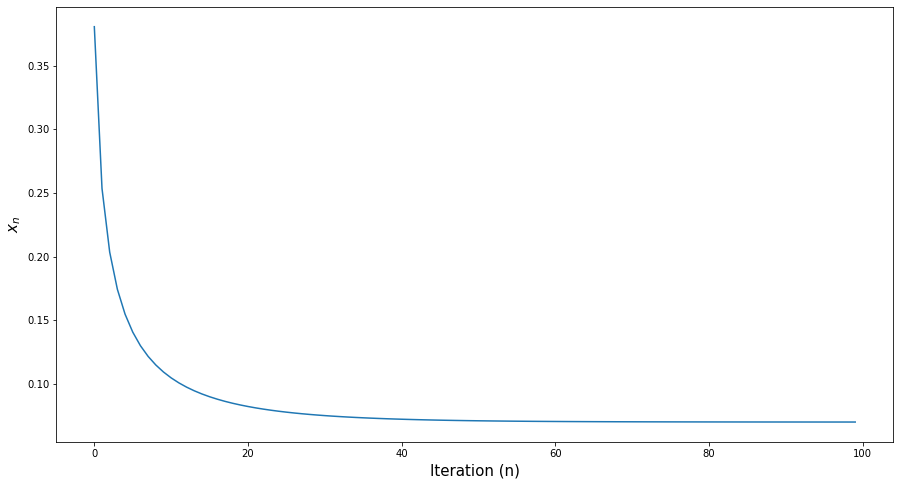

In [9]:
import matplotlib.pyplot as plt

# for r < 3, x always approaches a fixed point

r = uniform(0,3,1)[0]
x0 = uniform(0,1,1)[0]
n = 100

x_axis = list(range(n))
y_axis = logistic_n_times(x0,logistic,r,n)

fig, axes = plt.subplots(figsize = (15,8))
axes.set_xlabel('Iteration (n)', fontsize = 15)
axes.set_ylabel(r'$x_{n}$', fontsize = 15)
axes.plot(x_axis,y_axis)
print(f"r={r}, x0={x0}")

r=3.1186145735752655, x0=0.3805114872647152


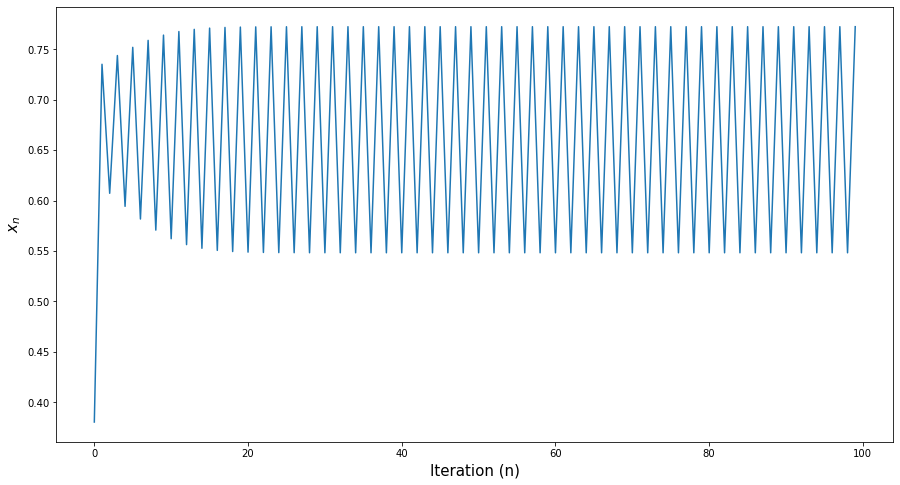

In [10]:
# for 3 <= r <= 3.4495, x approaches 2 fixed points and then oscilates between them
end = 1 + math.sqrt(6) #3.4495 
r= uniform(3.0,end,1)[0]
n = 100

x_axis = list(range(n))
y_axis = logistic_n_times(x0,logistic,r,n)

fig, axes = plt.subplots(figsize = (15,8))
axes.set_xlabel('Iteration (n)', fontsize = 15)
axes.set_ylabel(r'$x_{n}$', fontsize = 15)
axes.plot(x_axis,y_axis)
print(f"r={r}, x0={x0}")

r=3.916802796446485, x0=0.3805114872647152


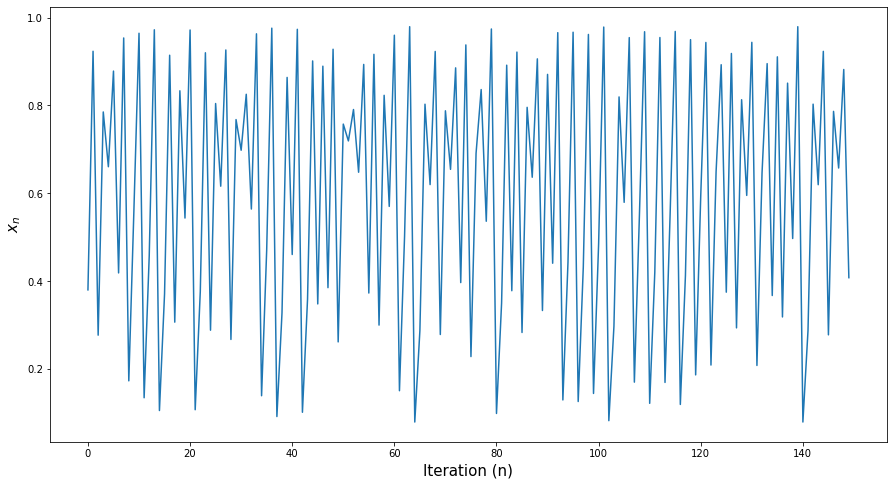

In [11]:
# for r > 3.4495, the number of fixed point increases from 4, 8 16 as r increases (also depends on x0)
# & eventually x becomes very unpredictable
start = 1 + math.sqrt(6) #3.4495
r= uniform(start,4.0,1)[0]
n = 150

x_axis = list(range(n))
y_axis = logistic_n_times(x0,logistic,r,n)

fig, axes = plt.subplots(figsize = (15,8))
axes.set_xlabel('Iteration (n)', fontsize = 15)
axes.set_ylabel(r'$x_{n}$', fontsize = 15)
axes.plot(x_axis,y_axis)
print(f"r={r}, x0={x0}")

# Exercise 5 (stretch): Famous Chaos Theory Plot 

There is a famous plot in chaos theory of the logistic map that relates values of the attractors in $x_t$ for values of $r$, detailing where the function tends to "end up" for each value of $r$.

<img src="logistic map.png" style="width: 400px;">

Reproduce this plot using the `matplotlib` package.

**Hint:** Produce samples from the function to fill arrays on the x and y axis!

**Hint:** Take the final 50 values in a series of data points produced by the function!

In [12]:
# What I want, for each r value an array of its last 50 Logistic Map Results and then plot r vs x

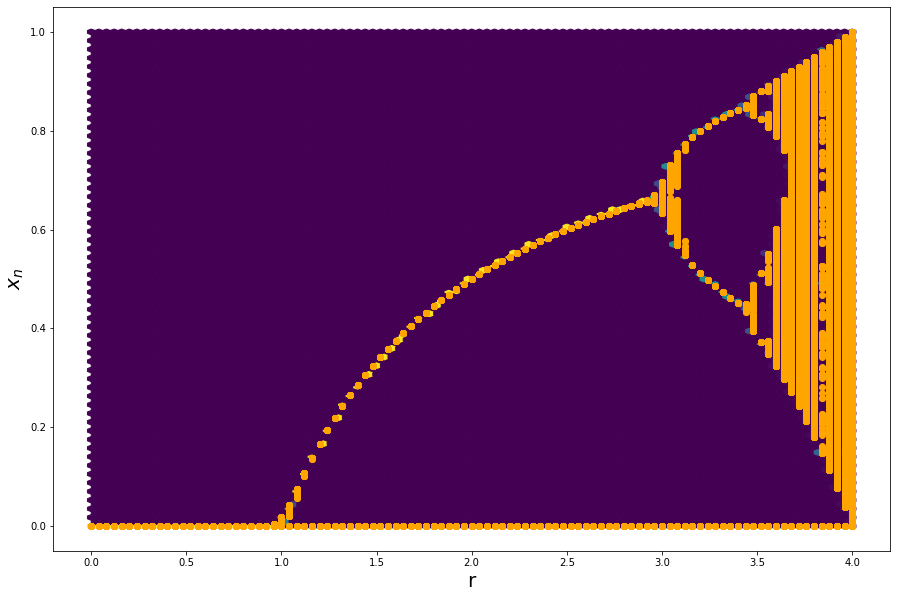

In [13]:
import numpy as np

x_axis_range = np.linspace(0, 4, 101)
y_axis_range = np.linspace(0, 1, 201)
#print(x_axis_range)

x_axis_points =[]
y_axis_points =[]

# for each r value run logistic map and get it's last 50 values
for r in x_axis_range:
    for x0 in y_axis_range:
        # the x-axis value is the current r for all the ys     
        x_point = [r for i in range(50)]
        # the y-axis value is the result of logistic map function for the current r and x0
        # only taking the last 50 values (for smaller r values r<3.449, we should have fixed points only)
        y_point = logistic_n_times(x0, logistic, r, 100)[-51:-1]      

        # Form: Each pint x and y point is a list of size 50
        # x_point [r,r,...,r]
        # y_point [Xn_1,Xn_2,...,Xn_50]
        
        x_axis_points.append(x_point)
        y_axis_points.append(y_point)
        

fig, axes= plt.subplots(figsize = (15,10))
axes.set_xlabel('r', fontsize = 20)
axes.set_ylabel(r'$x_{n}$', fontsize = 20)

plt.hexbin(x_axis_points, y_axis_points)
plt.scatter(x_axis_points, y_axis_points, c='orange')

plt.show()